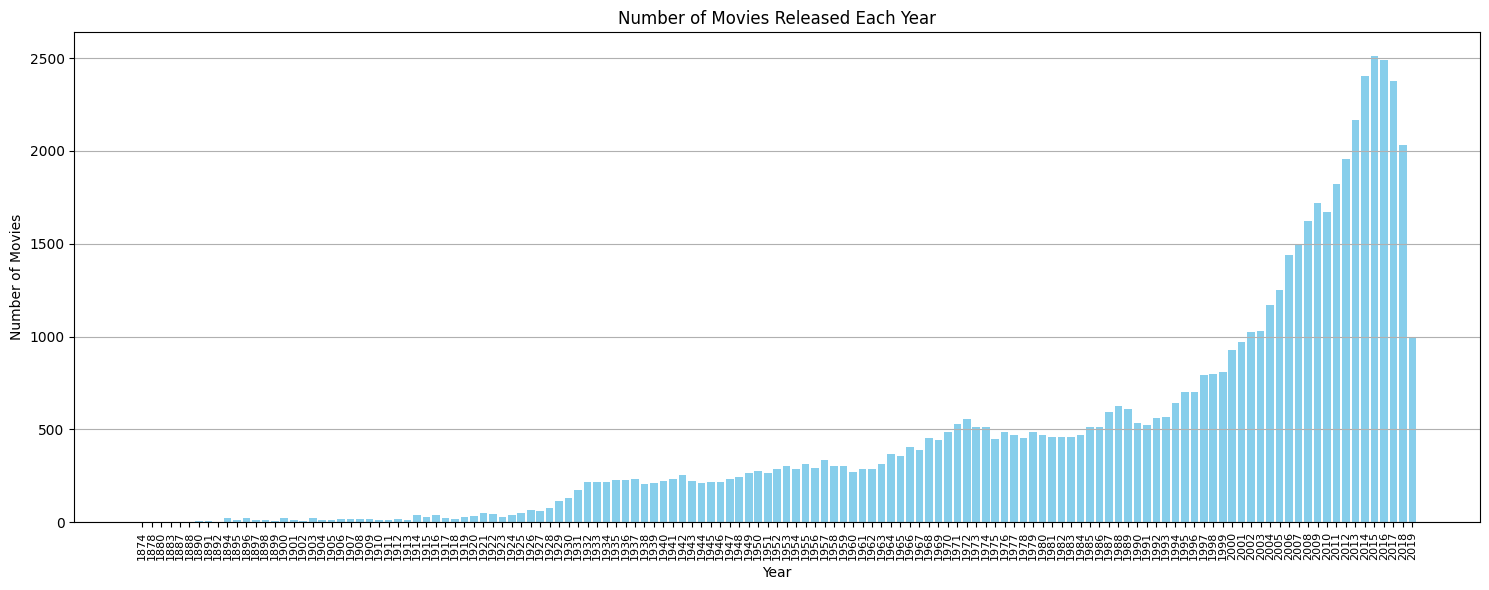

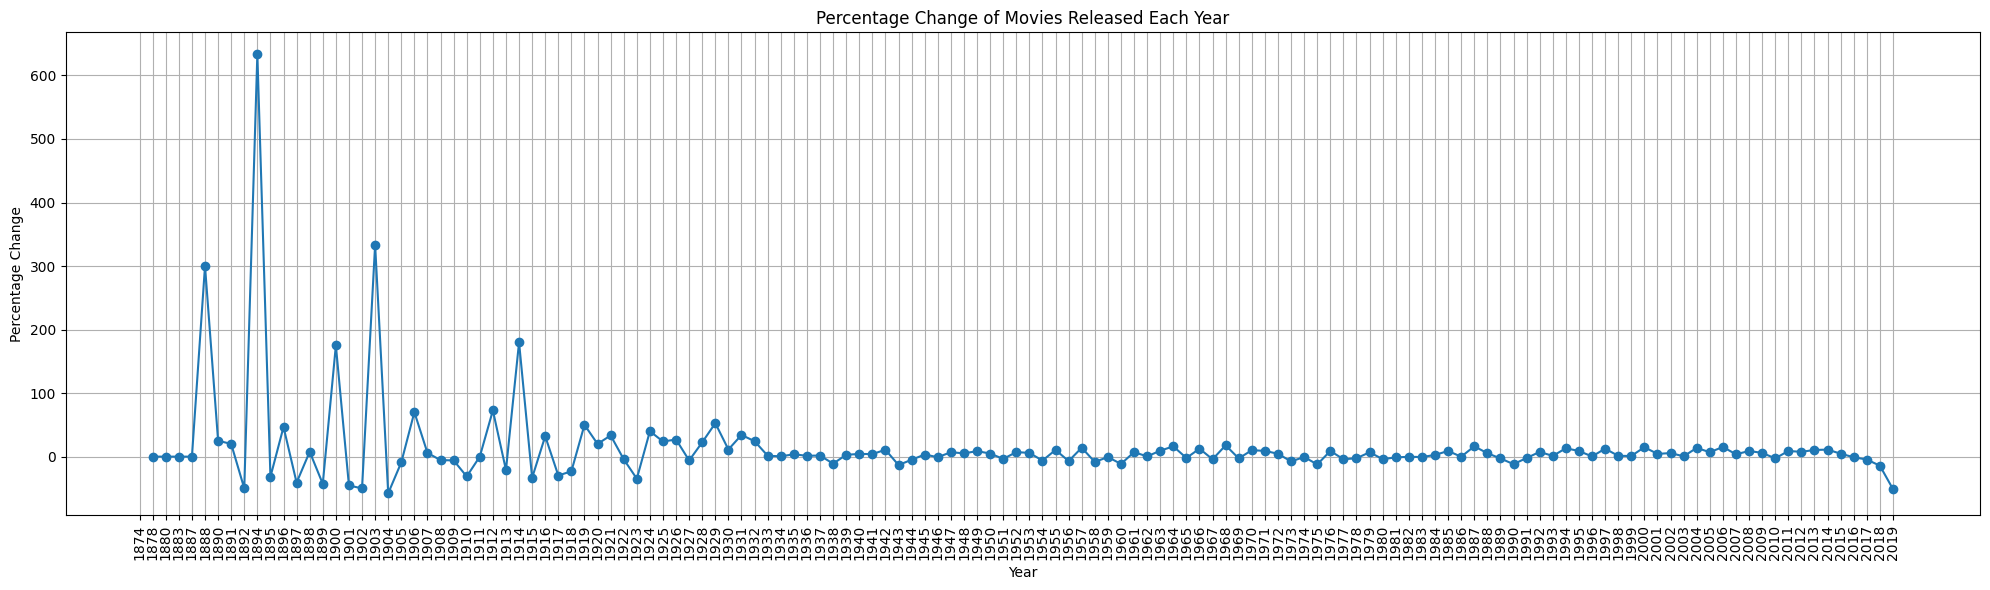

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

pd.read_csv("C:/Users/Emmanuel/Downloads/movies.csv")

movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)$')

plt.figure(figsize=(15, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(bottom=0.6)
plt.tight_layout()
plt.show()

percentage_change = movies_per_year.pct_change() * 100

plt.figure(figsize=(20, 6))
plt.plot(percentage_change.index, percentage_change.values, marker='o', linestyle='-')
plt.title('Percentage Change of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(bottom=0.6)
plt.tight_layout()
plt.show()

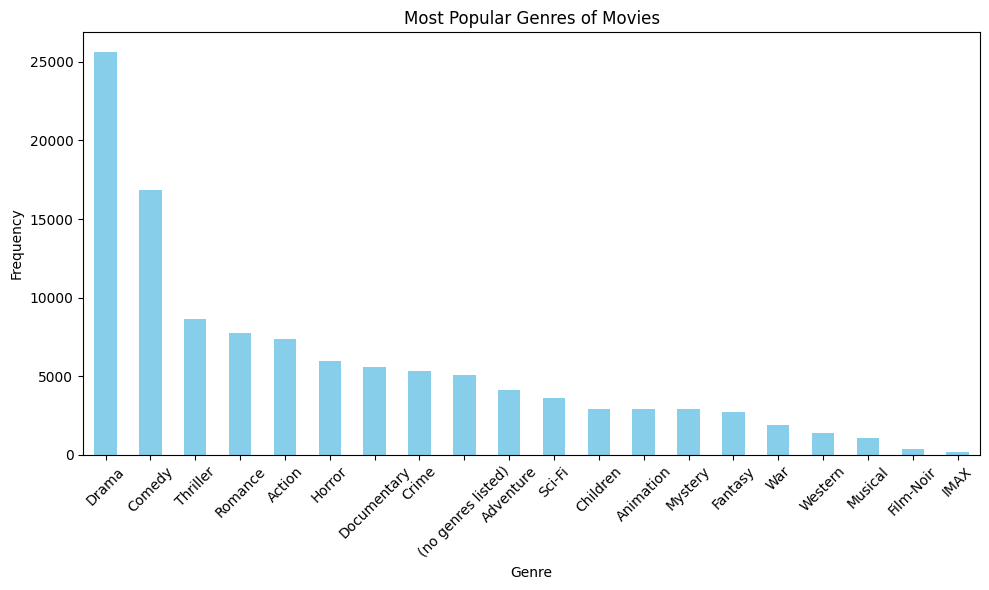

In [36]:
genres = movies['genres'].str.split('|', expand=True).stack()

pop_genres = genres.value_counts()

plt.figure(figsize=(10, 6))
pop_genres.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres of Movies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)$')

genres = movies['genres'].str.split('|', expand=True)

genres['movieId'] = movies['movieId']
genres['release_year'] = movies['release_year']

genres_melted = pd.melt(genres, id_vars=['movieId', 'release_year'], value_vars=range(0, len(genres_split.columns) - 2))

genres_melted.columns = ['movieId', 'release_year', 'genre_index', 'genre']

pd.read_csv("C:/Users/Emmanuel/Downloads/ratings.csv")

merged_genre = pd.merge(genres_melted, ratings_df, on='movieId')

average_rating = merged_genre.groupby(['release_year', 'genre'])['rating'].mean().unstack()

plt.figure(figsize=(15, 8))
for genre in average_rating.columns:
    plt.plot(average_rating.index, average_rating[genre], marker='o', label=genre)

plt.title('Average Movie Rating for Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 1.86 GiB for an array with shape (250000950,) and data type int64

### Memory not enough :(

In [53]:
pd.read_csv("C:/Users/Emmanuel/Downloads/ratings.csv")

ratings_count = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

ratings_count.columns = ['movieId', 'rating_count', 'average_rating']

merged = pd.merge(ratings_count, movies, on='movieId')

sorted = merged.sort_values(by=['rating_count', 'average_rating'], ascending=False)

top_20_movies = sorted.head(20)

print("Top 20 movies with the highest number of ratings and highest average rating:")
print(top_20_movies[['title', 'rating_count', 'average_rating']].to_string(index=False))

Top 20 movies with the highest number of ratings and highest average rating:
                                                                         title  rating_count  average_rating
                                                           Forrest Gump (1994)         81491        4.048011
                                              Shawshank Redemption, The (1994)         81482        4.413576
                                                           Pulp Fiction (1994)         79672        4.188912
                                              Silence of the Lambs, The (1991)         74127        4.151342
                                                            Matrix, The (1999)         72674        4.154099
                                     Star Wars: Episode IV - A New Hope (1977)         68717        4.120189
                                                          Jurassic Park (1993)         64144        3.679175
                                                   

In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings['release_season'] = ratings['timestamp'].dt.month.apply(lambda x: 
                                                                      'Spring' if 3 <= x <= 5 
                                                                      else 'Summer' if 6 <= x <= 8 
                                                                      else 'Fall' if 9 <= x <= 11 
                                                                      else 'Winter')

ratings_per_season = ratings['release_season'].value_counts()

most_popular_season = ratings_per_season.idxmax()

print("The most popular season for releasing movies is", most_popular_season)